In [103]:
import pandas as pd
import matplotlib.pyplot as plt

In [104]:
df = pd.read_csv('dataset/EUGasSC.csv')

In [105]:
df.head()
df = df[df['date']>'2016-12-31']

1. Gas supply time series

<AxesSubplot:xlabel='date'>

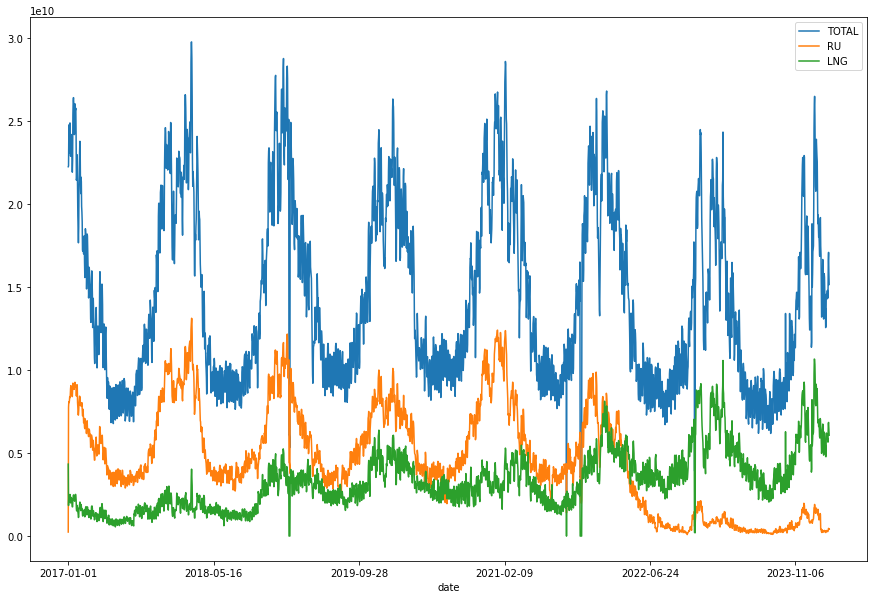

In [106]:
fig, ax = plt.subplots(figsize=(15,10))
g = df.groupby('date').sum().reset_index()
g.plot(x='date', y='TOTAL', ax=ax)
g.plot(x='date', y='RU', ax=ax)
g.plot(x='date', y='LNG', ax=ax)

2. Storage vs heating consumption

<AxesSubplot:xlabel='date'>

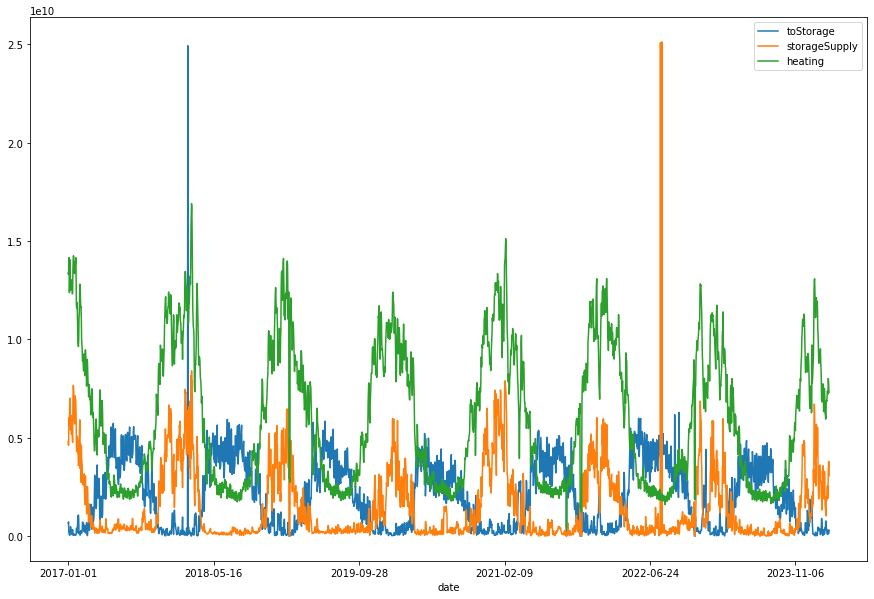

In [107]:
fig, ax = plt.subplots(figsize=(15,10))
g.plot(x='date', y='toStorage', ax=ax)
g.plot(x='date', y='storageSupply', ax=ax)
g["heating"] = g['house_heating'] + g['public_heating']
g.plot(x='date', y='heating', ax=ax)

3. Annual supply

<AxesSubplot:xlabel='year'>

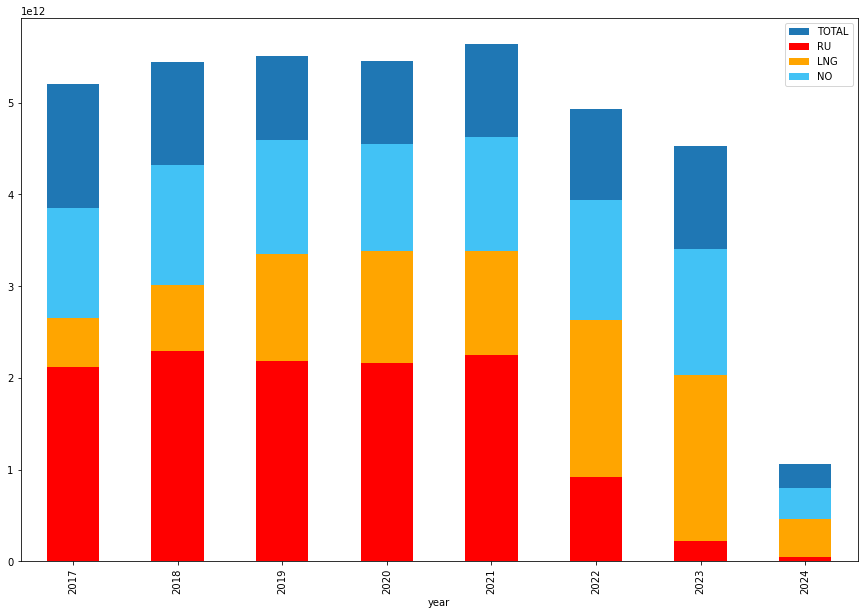

In [108]:
fig, ax = plt.subplots(figsize=(15,10))

df["year"] = pd.to_datetime(df["date"]).dt.year
g = df.groupby('year').sum().reset_index()
g.plot(x='year', y='TOTAL',kind='bar', ax=ax)
g.plot(x='year', y='RU', kind='bar', ax=ax, color='red')
g.plot(x='year', y='LNG', kind='bar', ax=ax, color='orange', bottom=g['RU'])
g.plot(x='year', y='NO', kind='bar', ax=ax, color='#42c2f5', bottom=g['LNG']+g['RU'])

<AxesSubplot:xlabel='country'>

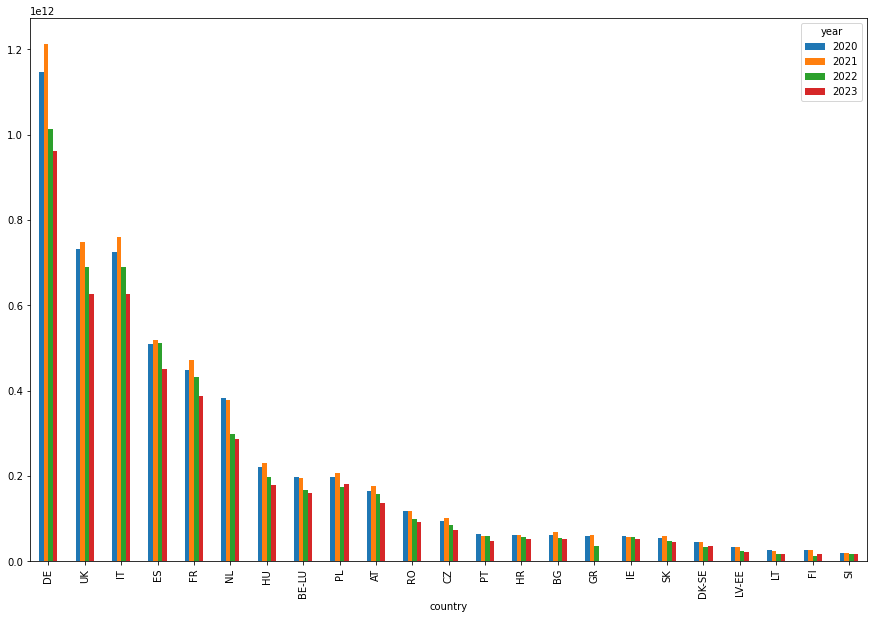

In [109]:
# plot bars for each country based on year
fig, ax = plt.subplots(figsize=(15,10))

g = df[(df['date']>='2020-01-01')&(df['date']<='2023-12-31')].groupby(['year', 'country']).sum().reset_index()
g = g.sort_values(by='TOTAL')
g.pivot(index='country', columns='year', values='TOTAL').sort_values(by=2020, ascending=False).plot(kind='bar', ax=ax)
